# AI ODYSSEY: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [77]:
pip install nltk

In [78]:
import pandas as pd
import numpy as np

db = pd.read_csv('/content/new_dataset.csv')
new_db = db
db.head()

,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...


**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [79]:
#ENTER YOUR CODE HERE

In [80]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

for i in range(len(db)):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(db['text'][i])
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  db['text'][i] = ' '.join(filtered_sentence)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [81]:
db.head()

,sentiment,text
0,Negative,@ xnausikaax oh ! u order ? 's horrible
1,Negative,A great hard training weekend . couple days re...
2,Negative,"Right , work Only 5 hours go I 'm free xD"
3,Negative,I craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow got ta work...


**Next, we'll remove some other info we dont need right now, like the handle names. I tried to do it this way because there was an error of a space coming up so that's why i created one entire function to do this




In [82]:
#ENTER YOUR CODE HERE

In [83]:
from nltk.stem import PorterStemmer
def clean_and_stem_text(text):
    text = re.sub(r'@\w+', '', text)

    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))

    filtered_words = [word for word in words if word.lower() not in stop_words]

    stemmer = PorterStemmer()

    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

for i in range(len(new_db)):
  new_db['text'][i] = clean_and_stem_text(new_db['text'][i])

new_db.head()

,sentiment,text
0,Negative,@ xnausikaax oh ! u order ? 's horribl
1,Negative,great hard train weekend . coupl day rest let ...
2,Negative,"right , work 5 hour go 'm free xd"
3,Negative,crave japanes food
4,Negative,jean michel jarr concert tomorrow got ta work ...


**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

In [84]:
#ENTER YOUR CODE HERE

Positive Text: lookin 4ward long weekend realli dont want go work 2day tho = [ x # myweak music live meet peopl make figur internet new ipod @ hillsongunit ca n't wait worship guy tonight . 'll much fun @ sillybeggar congrat jame ! ! 'm sure book go huge success @ debbybruck beauti ! children smile world smile @ bethofalltrad http : //twitpic.com/69bs9 - happi birthday ! @ ad_infinitum ye , . ultim vegan guid eric marcu : http : //bit.ly/rqp7n alway ask anyth , know . get write mee . fun nightt @ noopman remot ? prefer site . 's substitut work peopl person lol @ queenlizii - mayb queen tweet ! @ sunnaros yay return teaser tuesday garter ceremoni windsor castl @ eve76 would fine max erma gave away tasti salad day . lol @ rachelroseberri @ morganbritney .... start ice coffe well happi friday ! @ onlinepublicist thank @ elijahbutterz got pic whole jacket ? @ myke329 mad late good luck good talk mom , spend time friend ! @ mileycyru vote ! hope win great award ! good luck ! ! ! pray ! ! ! 

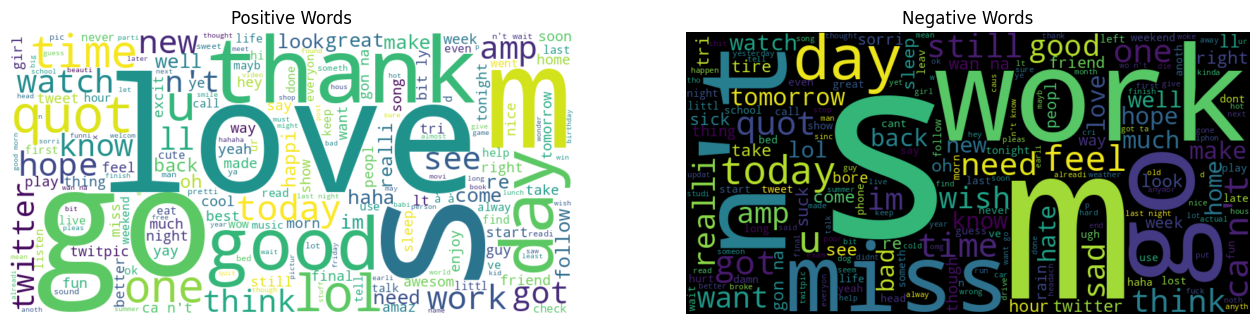

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = ' '.join(new_db[new_db['sentiment'] == 'Positive']['text'])
negative_text = ' '.join(new_db[new_db['sentiment'] == 'Negative']['text'])

print("Positive Text:", positive_text)
print("Negative Text:", negative_text)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Words')
plt.axis('off')

plt.show()

In [86]:
#ENTER YOUR CODE HERE

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [87]:
#ENTER YOUR CODE HERE

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_db['text'], new_db['sentiment'], test_size=0.2, random_state=42)

print(len(x_train))
print(len(x_test))

8000
2000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [89]:
#ENTER YOUR CODE HERE

In [90]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

# Convert text sequences into numerical sequences
sequences = tokenizer.texts_to_sequences(x_train)

# Get the word index
word_index = tokenizer.word_index

# Print the results
print("Sequences:", sequences)
print("Word Index:", word_index)
print("Vocabulary Size:", len(word_index))

Sequences: [[4180, 36, 307, 17, 6, 269, 2135, 902, 71, 545], [64, 323, 294, 78, 17, 13, 2, 8, 235, 765, 78], [2773, 3, 2774, 127, 611, 1503, 832, 383, 2, 1769], [100, 13, 2775, 2776, 2777, 4181, 44, 40, 65, 1150, 49, 978, 2775], [21], [520, 1288, 4, 2778, 1504, 2779, 4, 5, 4182, 4183, 72], [4184, 1, 113, 30, 51, 4, 241, 674], [4185], [109, 1770], [48, 413, 316, 75], [4186, 73, 14, 4187, 213, 1505, 177], [4188, 1060, 125, 4189, 497, 172, 2780, 4190, 5, 32, 4191, 1506, 59, 2, 766, 4192, 32, 4193], [22, 49, 1061, 903, 74, 60, 20], [2781, 72, 4194, 48, 34, 208, 160, 384, 559, 13, 47, 577], [4195, 22, 675, 10, 186, 42, 578], [4196, 1771], [4197, 38, 260, 46, 295], [92, 37, 38, 4198, 317, 4, 3, 833, 101], [1289, 473, 45, 4199, 15, 1, 255], [38, 4200], [2782, 32, 235, 4201, 2783, 4, 3, 173, 64], [4202, 84, 1062, 579, 4203, 646, 4204, 12, 4205, 12, 4206], [4207, 2784, 767, 546, 190, 4208, 2785, 1507, 384, 245, 4209, 4210, 76, 204], [14, 140, 1508, 1772, 174, 140, 1509, 1773, 1772, 307, 2136, 1

**Now transform the training and testing word sequences.**

In [91]:
#ENTER YOUR CODE HERE

In [92]:
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

# Print the results (for demonstration)
print("Training Sequences:", train_sequences)
print("Testing Sequences:", test_sequences)

max = 0
for i in range(len(train_sequences)):
  if len(train_sequences[i]) > max:
    max = len(train_sequences[i])

print(max)

Training Sequences: [[4180, 36, 307, 17, 6, 269, 2135, 902, 71, 545], [64, 323, 294, 78, 17, 13, 2, 8, 235, 765, 78], [2773, 3, 2774, 127, 611, 1503, 832, 383, 2, 1769], [100, 13, 2775, 2776, 2777, 4181, 44, 40, 65, 1150, 49, 978, 2775], [21], [520, 1288, 4, 2778, 1504, 2779, 4, 5, 4182, 4183, 72], [4184, 1, 113, 30, 51, 4, 241, 674], [4185], [109, 1770], [48, 413, 316, 75], [4186, 73, 14, 4187, 213, 1505, 177], [4188, 1060, 125, 4189, 497, 172, 2780, 4190, 5, 32, 4191, 1506, 59, 2, 766, 4192, 32, 4193], [22, 49, 1061, 903, 74, 60, 20], [2781, 72, 4194, 48, 34, 208, 160, 384, 559, 13, 47, 577], [4195, 22, 675, 10, 186, 42, 578], [4196, 1771], [4197, 38, 260, 46, 295], [92, 37, 38, 4198, 317, 4, 3, 833, 101], [1289, 473, 45, 4199, 15, 1, 255], [38, 4200], [2782, 32, 235, 4201, 2783, 4, 3, 173, 64], [4202, 84, 1062, 579, 4203, 646, 4204, 12, 4205, 12, 4206], [4207, 2784, 767, 546, 190, 4208, 2785, 1507, 384, 245, 4209, 4210, 76, 204], [14, 140, 1508, 1772, 174, 140, 1509, 1773, 1772, 307

**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [93]:
#ENTER YOUR CODE HERE

In [94]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_sequences = pad_sequences(train_sequences, maxlen=max, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max, padding='post', truncating='post')

print(type(train_sequences))
print(train_sequences[0])
print(test_sequences[0])

<class 'numpy.ndarray'>
[4180   36  307   17    6  269 2135  902   71  545    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
[ 340  565 1704 2041  110   10    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


**Label encode y.**

In [95]:
for i in range(len(y_train)):
  if y_train.iloc[i] == 'Positive':
    y_train.iloc[i] = 1
  else:
     y_train.iloc[i] = 0

for i in range(len(y_test)):
  if y_test.iloc[i] == 'Positive':
    y_test.iloc[i] = 1
  else:
    y_test.iloc[i] = 0

print(y_train)
print(y_test)

9254    1
1561    0
1670    0
6087    1
6669    1
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: sentiment, Length: 8000, dtype: object
6252    1
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    1
7853    1
1095    0
6929    1
Name: sentiment, Length: 2000, dtype: object


**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [96]:
import tensorflow as tf
import numpy as np
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-06-26 10:34:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-26 10:34:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-26 10:34:43--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [97]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(len(word_index) + 1,EMBEDDING_DIM,weights=[embedding_matrix],input_length=max,trainable=False)


Found 400000 word vectors.


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [102]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
sequence_input = Input(shape=(max), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#ENTER YOUR CODE HERE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

sequence_input = Input(shape=(max), dtype='int32')

embedding_sequences = embedding_layer(sequence_input)

x = SpatialDropout1D(0.2)(embedding_sequences)

x = Bidirectional(LSTM(128, return_sequences=False))(x)

x = Dropout(0.2)(x)

predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=sequence_input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

history = model.fit(train_sequences, y_train, validation_data=(test_sequences, y_test), epochs=15, batch_size=BATCH_SIZE)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 34)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 34, 300)           4138500   
                                                                 
 spatial_dropout1d_9 (Spati  (None, 34, 300)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_9 (Bidirecti  (None, 256)               439296    
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257 

In [103]:
print(type(train_sequences))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**Train the model on the train split, and validate it on the test split.**

In [ ]:
#ENTER YOUR CODE HERE

**Let's visualise the model's training history now.**

In [ ]:
#ENTER YOUR CODE HERE

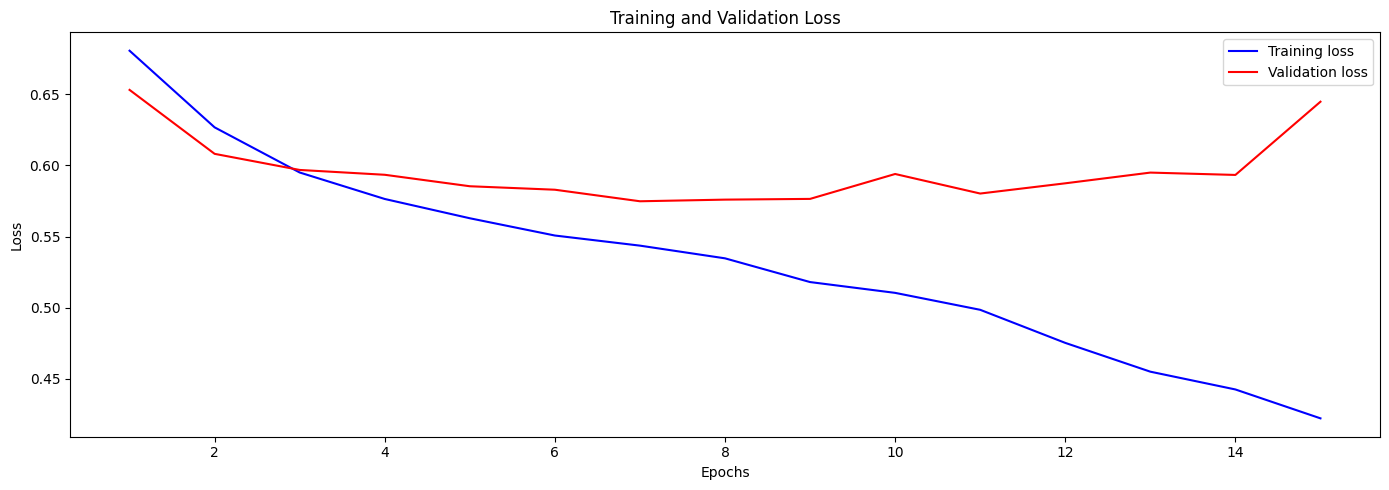

In [104]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(14, 5))


plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
#ENTER YOUR CODE HERE

<function matplotlib.pyplot.show(close=None, block=None)>

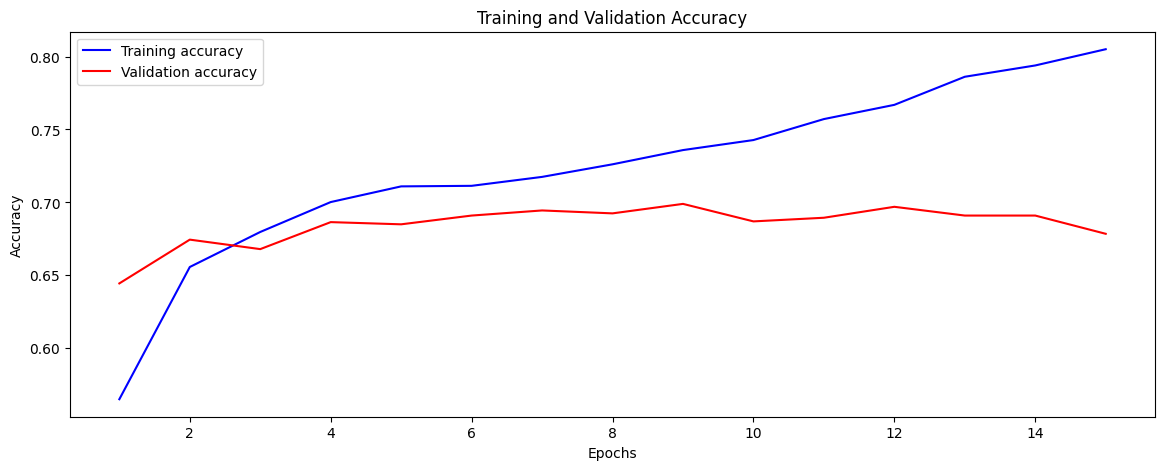

In [105]:
plt.figure(figsize=(14, 5))

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

**Lets see what the accuracy of the model is.**

In [ ]:
#ENTER YOUR CODE HERE

**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [ ]:
#ENTER YOUR CODE HERE

In [116]:
import random
rand = random.randint(0, len(train_sequences) - 1)
db = pd.read_csv('/content/new_dataset.csv')
text = db['text'].iloc[rand]
print(text)

random_sequence = tokenizer.texts_to_sequences([text])
text_sequence = pad_sequences(random_sequence, maxlen= max)
print(text_sequence)

predict = model.predict(text_sequence)
if predict < 0.5:
  print("Positive")
else:
  print("Negative")

Listening to Sash - Raindrops (Adam White &amp; Andy Moor remix), Girly vocal tune..but nice 
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 2002 7835  897  701   33
  3469 7837 3360 1384 1561  100]]
1/1 [==============================] - 0s 57ms/step
Positive


In [ ]:
#ENTER YOUR CODE HERE

**We can try this on a random string as well.**

In [115]:
input_str="I hate everyone on earth!"

sequence = tokenizer.texts_to_sequences([input_str])
sequence = pad_sequences(sequence, maxlen=max)

prediction = model.predict(sequence)

if prediction > 0.5:
    print("Negative")
else:
    print("Positive")

1/1 [==============================] - 0s 52ms/step
Negative


## GOOD JOB!